## Dependencies

In [ ]:
!sudo apt-get install --quiet -y poppler-utils

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.7 [186 kB]
Fetched 186 kB in 1s (209 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 126333 files and direc

In [ ]:
!pip install git+https://github.com/illuin-tech/colpali.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.2 MB/s eta 0:00:00


In [ ]:
!pip install -q pdf2image requests bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.1 MB/s eta 0:00:00


In [ ]:
!pip install qwen-vl-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 13.5 MB/s eta 0:00:00


## Nomic Architecture vs Regular multimodal RAG

### Nomic Architecture

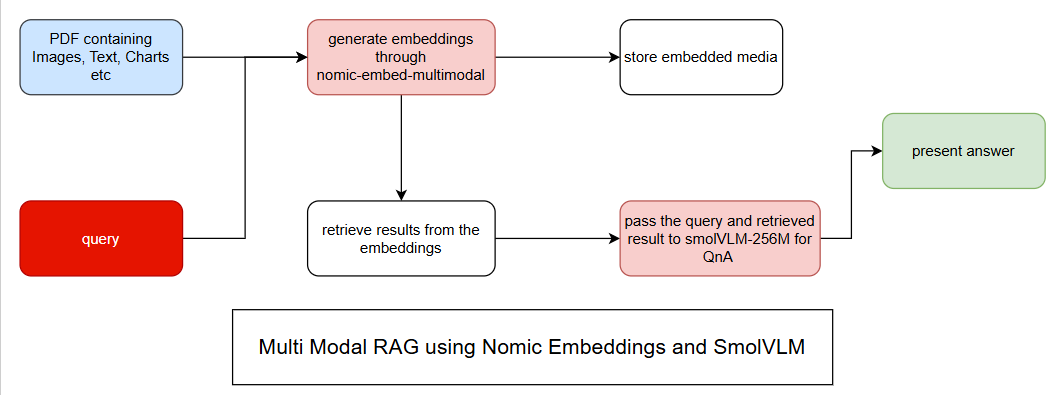

### Regular Multimodal RAG


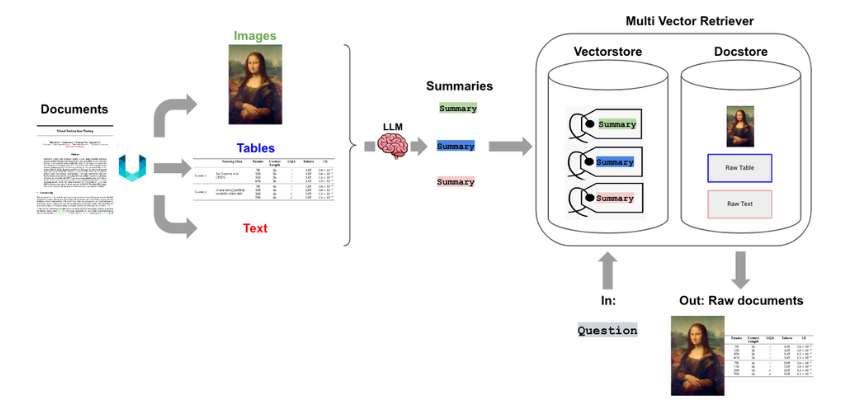

## Code

### Loading Nomic for embeddings

In [ ]:
import torch
from PIL import Image
from transformers.utils.import_utils import is_flash_attn_2_available
from colpali_engine.models import BiQwen2_5, BiQwen2_5_Processor


model_name = "nomic-ai/nomic-embed-multimodal-3b"

model = BiQwen2_5.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="cuda:0",  # or "mps" if on Apple Silicon
    attn_implementation="flash_attention_2" if is_flash_attn_2_available() else None,
).eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.53G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/216 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


adapter_model.safetensors:   0%|          | 0.00/240M [00:00<?, ?B/s]

In [ ]:
processor = BiQwen2_5_Processor.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/573 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

### Convert individual pdf pages to images

In [ ]:
import os
import requests
from pdf2image import convert_from_path, convert_from_bytes

PRELOADED_PDFS = {
    "1": {"title": "Attention Is All You Need", "file": "Attention Is All You Need.pdf"},
    "2": {"title": "Deep Residual Learning", "file": "Deep Residual Learning.pdf"}
}

def load_pdf_choice():
    print("Choose an option:")
    print("1: Use 'Attention Is All You Need'")
    print("2: Use 'Deep Residual Learning'")
    print("3: Provide your own PDF (local path or URL)")

    choice = input("Enter 1, 2, or 3: ").strip()

    if choice in PRELOADED_PDFS:
        selected = PRELOADED_PDFS[choice]
        print(f"\nYou selected: {selected['title']}")
        images = convert_from_path(selected["file"])
        return {
            "title": selected["title"],
            "file": selected["file"]
        }

    elif choice == "3":
        path_or_url = input("Enter local PDF path or direct PDF URL: ").strip()

        if path_or_url.lower().startswith("http"):
            try:
                response = requests.get(path_or_url)
                response.raise_for_status()
                pdf_bytes = response.content
                title = os.path.splitext(os.path.basename(path_or_url))[0]
                images = convert_from_bytes(pdf_bytes)
                print(f"\nYou loaded: {title} from URL")
                return {
                    "title": title,
                    "file": path_or_url,
                    "images": images
                }
            except Exception as e:
                print(f"----- Failed to download PDF: {e} -----")
                return None

        elif os.path.exists(path_or_url) and path_or_url.lower().endswith(".pdf"):
            with open(path_or_url, "rb") as f:
                pdf_bytes = f.read()
            title = os.path.splitext(os.path.basename(path_or_url))[0]
            images = convert_from_bytes(pdf_bytes)
            print(f"\nYou loaded: {title} from local file")
            return {
                "title": title,
                "file": path_or_url,
                "images": images
            }

        else:
            print("----- Invalid path or URL. ------")
            return None

    else:
        print("----- Invalid choice. -----")
        return None

In [ ]:
# Replace the beginning of your current logic with this
pdf_data = load_pdf_choice()

if pdf_data is None:
    exit("Exiting due to invalid input.")

# Use this single-PDF `pdf_data` object in your embedding loop
PDFs = [pdf_data]  # Your pipeline expects a list of PDFs


Choose an option:
1: Use 'Attention Is All You Need'
2: Use 'Deep Residual Learning'
3: Provide your own PDF (local path or URL)
Enter 1, 2, or 3: 3
Enter local PDF path or direct PDF URL: https://arxiv.org/pdf/2501.00544

You loaded: 2501 from URL


In [ ]:
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

def display_pdf_images(images_list):
    """Display all images in the provided list as subplots with 5 images per row."""
    num_images = len(images_list)
    num_rows = num_images // 5 + (1 if num_images % 5 > 0 else 0)
    fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))
    if num_rows == 1:
        axes = [axes] if num_images == 1 else axes
    else:
        axes = axes.flatten()
    for i, img in enumerate(images_list):
        if i < len(axes):
            ax = axes[i]
            ax.imshow(img)
            ax.set_title(f"Page {i+1}")
            ax.axis('off')
    for j in range(num_images, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

PDFs = [pdf_data]

for pdf in PDFs:
  if "images" not in pdf or not pdf["images"]:
    try:
      pdf["images"] = convert_from_path(pdf["file"])
    except Exception as e:
      print(f"Failed to convert from path: {e}")

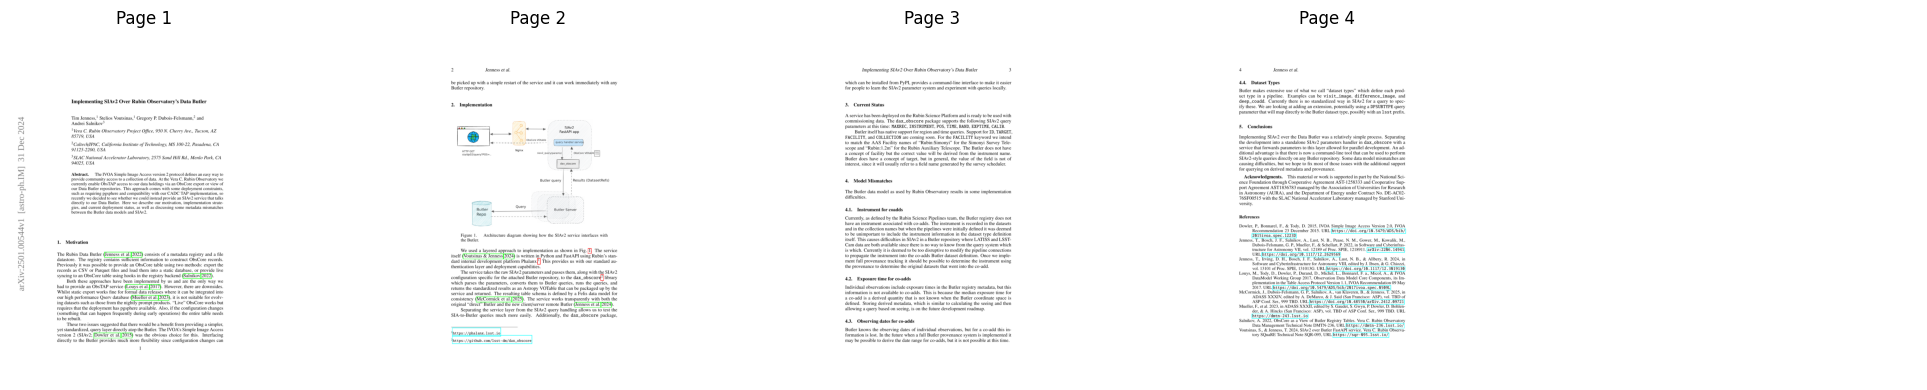

In [ ]:
display_pdf_images(PDFs[0]["images"][:5])

In [ ]:
from torch.utils.data import Dataset, DataLoader

class PDFImageDataset(Dataset):
    def __init__(self, pdfs_list):
        self.images = []
        self.filenames = []
        for pdf in pdfs_list:
            for i, img in enumerate(pdf["images"]):
                self.images.append(img)
                self.filenames.append(f"{pdf['title']}_page_{i+1}")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return {
            "image": self.images[idx],
            "image_filename": self.filenames[idx]
        }

pdf_dataset = PDFImageDataset(PDFs)
dataloader = DataLoader(
    pdf_dataset,
    batch_size=4,
    shuffle=False,
    collate_fn=lambda x: processor.process_images([a["image"] for a in x]),
)

In [ ]:
len(dataloader.dataset.images)

4

### Generate image embeddings

In [ ]:
!pip install pinecone -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 9.9 MB/s eta 0:00:00


In [ ]:
from pinecone import Pinecone, ServerlessSpec

key = 'pcsk_4HmpXu_U3o7QmLhiDdQXVukMtybFS6UUhXij3aTmyzevSSZ7WEPZGFUhHGDoZ6VUHkMkRQ'
pc = Pinecone(api_key=key)

index_name = "rag-multimodal"
pc.list_indexes()

[
    {
        "name": "rag-multimodal",
        "metric": "cosine",
        "host": "rag-multimodal-ejzuolb.svc.aped-4627-b74a.pinecone.io",
        "spec": {
            "serverless": {
                "cloud": "aws",
                "region": "us-east-1"
            }
        },
        "status": {
            "ready": true,
            "state": "Ready"
        },
        "vector_type": "dense",
        "dimension": 2048,
        "deletion_protection": "disabled",
        "tags": null
    }
]

In [ ]:
pc.delete_index(index_name)
pc.list_indexes()

[]

In [ ]:
if index_name not in pc.list_indexes().names():
  # If index doesn't exist, create it
  pc.create_index(
      name=index_name,
      dimension=2048,
      metric="cosine",
      spec=ServerlessSpec(cloud="aws", region="us-east-1")
      )

index = pc.Index(index_name)

In [ ]:
pc.list_indexes()

[
    {
        "name": "rag-multimodal",
        "metric": "cosine",
        "host": "rag-multimodal-ejzuolb.svc.aped-4627-b74a.pinecone.io",
        "spec": {
            "serverless": {
                "cloud": "aws",
                "region": "us-east-1"
            }
        },
        "status": {
            "ready": true,
            "state": "Ready"
        },
        "vector_type": "dense",
        "dimension": 2048,
        "deletion_protection": "disabled",
        "tags": null
    }
]

In [ ]:
# Directory where images will be saved
image_save_dir = "saved_images"

# Create directory if it doesn't exist
if not os.path.exists(image_save_dir):
    os.makedirs(image_save_dir)

image_counter = 0
for pdf_idx, pdf in enumerate(PDFs):
    print(f"Generating embeddings for {len(pdf['images'])} pages in {pdf['title']}")
    pdf['page_embeddings'] = []

    batch_size = 1
    for i in range(0, len(pdf["images"]), batch_size):
        batch_images = pdf["images"][i:i+batch_size]
        inputs = processor.process_images(batch_images)
        inputs = {k: v.to(model.device) for k, v in inputs.items()}

        with torch.no_grad():
            embeddings = model(**inputs)

        embeddings = embeddings.cpu()
        del inputs

        embeddings = embeddings / torch.norm(embeddings, dim=1, keepdim=True)
        torch.cuda.empty_cache()

        for j, emb in enumerate(embeddings):
            if i + j < len(pdf["images"]):
                unique_id = f"{pdf['title']}_page_{i+j+1}"

                # Save the image locally
                image = pdf["images"][i + j]
                image_filename = f"{pdf['title']}_page_{i+j+1}.jpg"
                image_filepath = os.path.join(image_save_dir, image_filename)
                image.save(image_filepath)

                # Metadata including the local image path
                metadata = {
                    "title": pdf['title'],
                    "page_number": i + j + 1,
                    "file": pdf['file'],
                    "image": image_filepath  # Store the local image path
                }

                # Upsert the embedding and metadata into Pinecone
                index.upsert(vectors=[(unique_id, emb.tolist(), metadata)])
                image_counter += 1

print(f"Generated embeddings for {image_counter} PDF pages and saved the images locally.")


Generating embeddings for 4 pages in 2501
Generated embeddings for 4 PDF pages and saved the images locally.


In [ ]:
embeddings.shape

torch.Size([1, 2048])

In [ ]:
pdf

{'title': '2501',
 'file': 'https://arxiv.org/pdf/2501.00544',
 'images': [<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200>],
 'page_embeddings': []}

### Retrieve results

In [ ]:
def retrieve(query: str, k: int = 3) -> list:
    """Retrieve semantically similar items from Pinecone based on embeddings"""
    # 1. Embed & normalize the query
    q_inputs = processor.process_queries([query])
    with torch.no_grad():
        q_inputs = {k: v.to(model.device) for k, v in q_inputs.items()}
        q_emb = model(**q_inputs).float().cpu().numpy()
    q_emb /= np.linalg.norm(q_emb)

    # 2. Query Pinecone
    results = index.query(vector=[q_emb.tolist()], top_k=k, include_metadata=True)

    # 3. Build the return list, loading each image from disk
    retrieved = []
    for match in results["matches"]:
        md = match["metadata"]
        image = None
        if "image" in md:
            try:
                image = Image.open(md["image"])  # md["image"] is your saved local path
            except Exception as e:
                print(f"⚠️ could not load image {md['image']}: {e}")

        retrieved.append({
            "title":       md["title"],
            "file":        md["file"],
            "page_number": md["page_number"],
            "score":       match["score"],
            "image":       image
        })

    return retrieved

### Load a vision model fro QnA

In [ ]:
from PIL.Image import Image

In [ ]:
from transformers import AutoProcessor, AutoModelForVision2Seq

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the processor and model
vlm_processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-256M-Instruct")

vlm_model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceTB/SmolVLM-256M-Instruct"
).to(device)

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/429 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.55M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

In [ ]:
from PIL import Image

def query_vlm(query: str, images: list[Image.Image]) -> str:
    """
    Queries SmolVLM-256M-Instruct with text and images.
    """
    # Prepare the messages for the chat template
    message_content = [{"type": "image"} for _ in images]
    message_content.append({"type": "text", "text": query})

    messages = [
        {
            "role": "system",
            "content": "You are an expert professional PDF analyst who gives rigorous in-depth answers. \
            Analyse the context you've been given and give answer accordingly like an expert with relevant information."
        },
        {
            "role": "user",
            "content": message_content
        }
    ]

    # Apply the chat template
    prompt = vlm_processor.apply_chat_template(messages, add_generation_prompt=True)

    # Prepare the inputs
    inputs = vlm_processor(text=prompt, images=images, return_tensors="pt").to(device)

    # Generate the response
    with torch.no_grad():
        generated_ids = vlm_model.generate(**inputs, max_new_tokens=1000)

    # Decode the generated response
    response = vlm_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return response

### Plot results

In [ ]:
import textwrap
from matplotlib import gridspec
import numpy as np

def plot_rag_result(query: str, answer: str, images: list[Image]) -> None:
    """Plots user query, retrieved source doc as image(s), and VLM answer"""
    wrapped_query = '\n'.join(textwrap.wrap(query, width=70))
    num_images = len(images)
    fig = plt.figure(figsize=(14, 10))
    outer = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.1)
    if num_images == 1:
        ax1 = fig.add_subplot(outer[0])
        ax1.imshow(images[0])
        ax1.axis('off')
        ax1.set_title("Source Document\nretrieved by Nomic Embed Multimodal",
                      fontsize=12, fontweight='bold', loc='left', pad=0)
    else:
        left = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0])
        fig.text(0.1, 0.9, "Source Documents\nretrieved by: Nomic Embed Multimodal",
                fontsize=12, fontweight='bold', va='top', ha='left')
        if num_images == 2:
            rows, cols = 1, 2
        else:
            cols = min(int(np.ceil(np.sqrt(num_images))), 3)
            rows = int(np.ceil(num_images / cols))
        inner = gridspec.GridSpecFromSubplotSpec(rows, cols, subplot_spec=left[0],
                                                wspace=0.05, hspace=0.05)
        for i, image in enumerate(images):
            ax_sub = fig.add_subplot(inner[i])
            ax_sub.imshow(image)
            ax_sub.axis('off')
    ax2 = fig.add_subplot(outer[1])
    ax2.axis('off')
    ax2.set_title("Answer generated by SMOLVLM-256M-Instruct", fontsize=12, fontweight='bold', loc='left')
    wrapped_answer = '\n'.join(['\n'.join(textwrap.wrap(line, width=80)) for line in answer.split('\n')])

    # shrink font as text gets longer
    fontsize = min(9, max(4, 9 - ((len(wrapped_answer) - 500) // 1000)))

    ax2.text(0.02, 0.97, wrapped_answer, transform=ax2.transAxes, fontsize=fontsize, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='#2C3E50', linewidth=2, pad=1.0))
    fig.suptitle(f"Query: {wrapped_query}", fontsize=14, fontweight='bold', y=0.96)
    plt.show()

### Querying

In [ ]:
doc_query = "How did they implement it?"
doc_rag_results = retrieve(doc_query, k=1)

UnauthorizedException: (401)
Reason: Unauthorized
HTTP response headers: HTTPHeaderDict({'Date': 'Mon, 28 Apr 2025 09:27:49 GMT', 'Content-Type': 'text/plain', 'Content-Length': '12', 'Connection': 'keep-alive', 'x-pinecone-auth-rejected-reason': 'Malformed domain', 'www-authenticate': 'Malformed domain', 'server': 'envoy'})
HTTP response body: Unauthorized


In [ ]:
doc_rag_results

[{'title': '2501',
  'file': 'https://arxiv.org/pdf/2501.00544',
  'page_number': 1.0,
  'score': 0.183217824,
  'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x2200>}]

In [ ]:
doc_image = doc_rag_results[0]["image"]
doc_answer = query_vlm(doc_query, [doc_image])

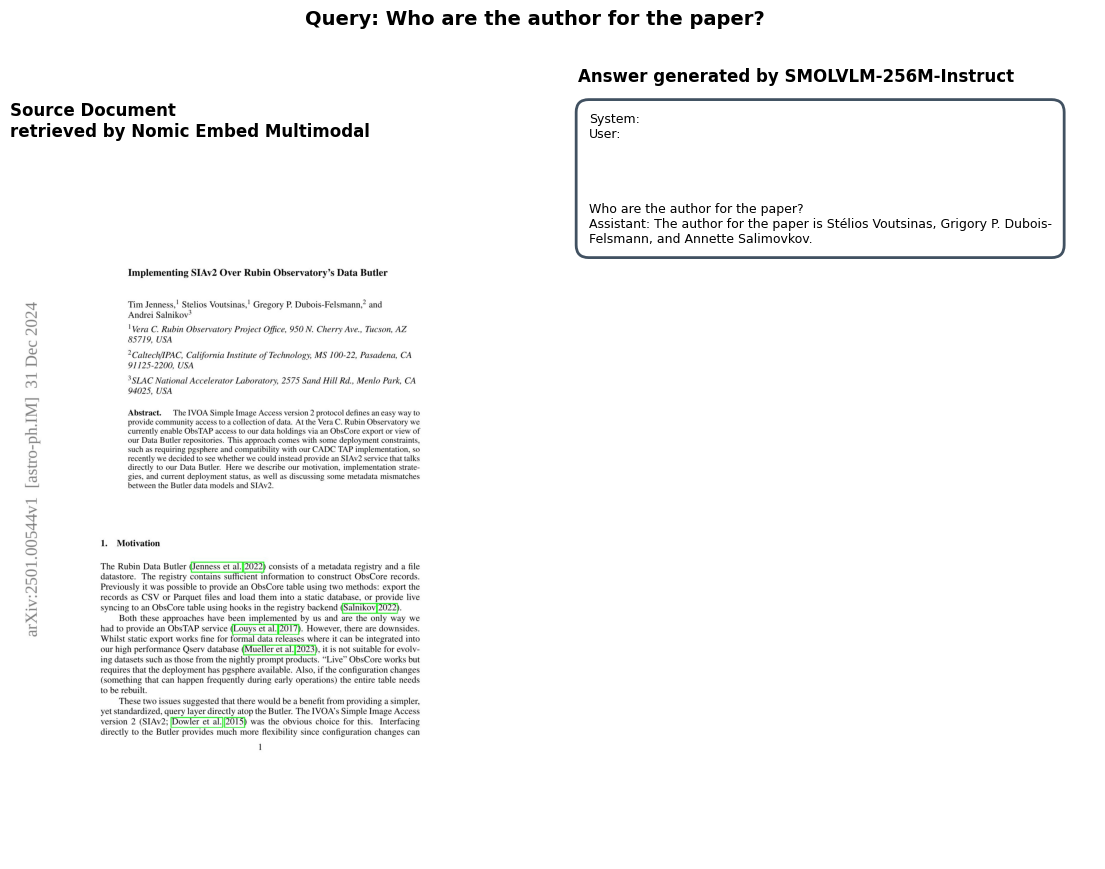

In [ ]:
plot_rag_result(doc_query, doc_answer, [doc_image])

In [ ]:
pc.delete_index(index_name)